# **Modulo 3: Advanced Machine Learning**
# **Examen de Certificacion: Intento 1**
# **En este examen, trabajarás con un dataset de mayor complejidad**
# **Aplicando un análisis no supervisado utilizando K-means o PCA para identificar patrones ocultos y luego utilizando un modelo Perceptrón Multicapa (MLP) para realizar predicciones.**


### **1.Limpieza de datos**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Cargar y explorar los datos
train_data = pd.read_csv('E:/Bootcamp/examendojo/examenlearning/train.csv')
test_data = pd.read_csv('E:/Bootcamp/examendojo/examenlearning/test.csv')

# Verificar si hay valores nulos
print("Valores nulos en los datos de entrenamiento:", train_data.isnull().sum().sum())
print("Valores nulos en los datos de prueba:", test_data.isnull().sum().sum())

# Preprocesamiento: Normalización
features_train = train_data.drop(columns=['Activity', 'subject'])
features_test = test_data.drop(columns=['Activity', 'subject'])

scaler = MinMaxScaler()
normalized_train = scaler.fit_transform(features_train)
normalized_test = scaler.transform(features_test)

# Convertir a DataFrame
normalized_train_df = pd.DataFrame(normalized_train, columns=features_train.columns)
normalized_test_df = pd.DataFrame(normalized_test, columns=features_test.columns)

# Adjuntar las columnas de 'Activity' y 'subject' de nuevo
normalized_train_df['Activity'] = train_data['Activity']
normalized_train_df['subject'] = train_data['subject']
normalized_test_df['Activity'] = test_data['Activity']
normalized_test_df['subject'] = test_data['subject']
def handle_missing_values(df):
    # Llenar con la media o eliminar filas/columnas, dependiendo del caso
    df.fillna(df.mean(), inplace=True)
    return df


Valores nulos en los datos de entrenamiento: 0
Valores nulos en los datos de prueba: 0


### **2. Análisis no supervisado con PCA o K-means**

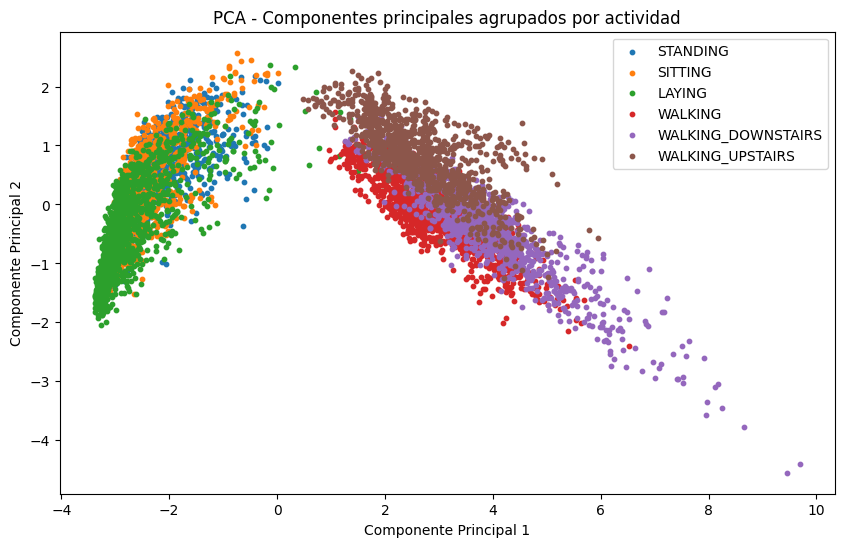

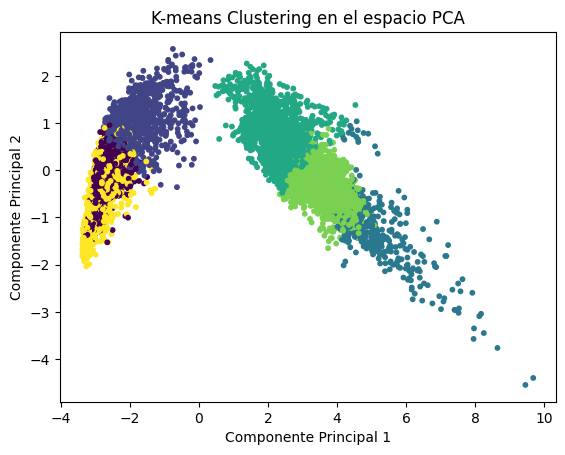

In [2]:
# Opción PCA
pca = PCA(n_components=2)
principal_components_train = pca.fit_transform(normalized_train_df.drop(columns=['Activity', 'subject']))

# Crear DataFrame para componentes principales
pca_train_df = pd.DataFrame(data=principal_components_train, columns=['PC1', 'PC2'])
pca_train_df['Activity'] = train_data['Activity']

# Visualizar PCA
plt.figure(figsize=(10,6))
for activity in pca_train_df['Activity'].unique():
    subset = pca_train_df[pca_train_df['Activity'] == activity]
    plt.scatter(subset['PC1'], subset['PC2'], label=activity, s=10)
plt.title('PCA - Componentes principales agrupados por actividad')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()
# Opción K-means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(normalized_train_df.drop(columns=['Activity', 'subject']))
kmeans_labels = kmeans.labels_

# Visualización de K-means
plt.scatter(principal_components_train[:, 0], principal_components_train[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('K-means Clustering en el espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### **3. Modelado con MLP**


In [3]:
# Codificar las etiquetas de la actividad
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Activity'])
y_test = label_encoder.transform(test_data['Activity'])

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(normalized_train, y_train, test_size=0.2, random_state=42)

# Configurar el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, batch_size=32, learning_rate_init=0.001, random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=(100, 50), max_iter=500,
              random_state=42)

### **4. Evaluación del modelo**


In [6]:
# Evaluar el modelo con el conjunto de validación
y_pred = mlp.predict(X_val)

# Métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))

# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred)
print("Matriz de confusión:\n", conf_matrix)

Reporte de clasificación:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.94      0.97      0.96       262
          STANDING       0.97      0.95      0.96       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       0.99      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      0.98      0.99       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471

Matriz de confusión:
 [[280   0   0   0   0   0]
 [  0 255   7   0   0   0]
 [  0  15 261   0   0   0]
 [  0   0   0 246   0   1]
 [  0   0   0   0 206   0]
 [  0   0   0   1   2 197]]


## Como podemos observar, el modelo es capaz de predecir correctamente la mayoria de las actividades fisicas

### **5.Visualizacion de las curvas**


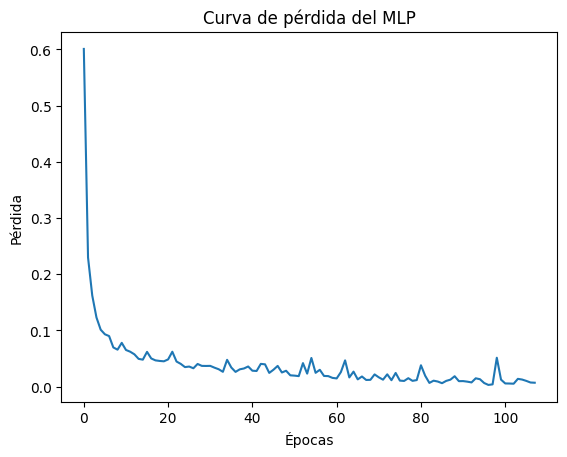

In [5]:
plt.plot(mlp.loss_curve_)
plt.title('Curva de pérdida del MLP')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

Reflexión sobre los Resultados del Análisis No Supervisado
Insights del Análisis de Clusters y PCA:

Dicho analisis proporciono insights utiles acerca de las actividades, desde caminar, caminar por las escaleras y correr, en dicho contexto, características como la aceleración, la frecuencia cardíaca y otros datos sensoriales son loas mas importantes. El análisis de PCA nos ayuda a identificar cuáles de estas características son más influyentes en la variabilidad de los datos.

Discute el rendimiento del MLP y cómo podría mejorarse:
El MLP se entrena con los datos normalizados y se evalúa utilizando un conjunto de validación. El uso de métricas como el reporte de clasificación y la matriz de confusión permite evaluar el rendimiento del modelo, el cual es adecuado para lograr predecir las distintas actividades fisicas
